<a href="https://colab.research.google.com/github/Jayameena832/Is-the-road-safe-Project/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import tensorflow as tf
import keras
import pandas as pd

In [124]:
tf.keras.datasets.fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [125]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [126]:
X_train.shape

(60000, 28, 28)

In [127]:
X_train[5].shape

(28, 28)

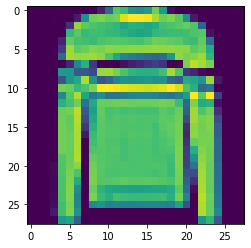

In [128]:
import matplotlib.pyplot as plt
image = plt.imshow(X_train[5])
image

In [129]:
import cv2
backtorgb = cv2.cvtColor(X_train[5],cv2.COLOR_GRAY2RGB)

In [130]:
backtorgb

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

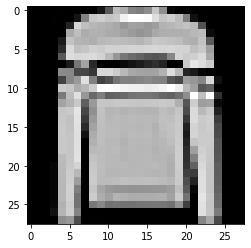

In [131]:
plt.imshow(backtorgb)

In [132]:
import numpy as np

In [133]:
img1 = np.zeros((len(X_train),28,28,3))
for i in range(X_train.shape[0]):
  img1[i]=cv2.cvtColor(X_train[i],cv2.COLOR_GRAY2RGB)

In [134]:
def resize_image_array(img, img_size_dims):
    img = cv2.resize(img, dsize=img_size_dims, 
                     interpolation=cv2.INTER_CUBIC)
    img = np.array(img, dtype=np.float32)
    return img

In [135]:
IMG_DIMS = (32, 32)
img1 = np.array([resize_image_array(img, img_size_dims=IMG_DIMS) for img in img1])

In [136]:
#Y_train = tf.keras.utils.to_categorical(Y_train , num_classes=10)

In [137]:
Y_train.shape

(60000,)

In [138]:
img1[8].shape

(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


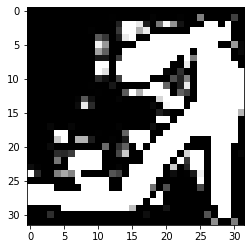

In [139]:
plt.imshow(img1[8])

In [140]:
from keras.models import Sequential

In [141]:
#only model building part
model=Sequential()
model_part1=tf.keras.applications.ResNet50(
    include_top=False, #deletes the outer layer
    weights="imagenet",
    input_tensor=None,
    input_shape=(32,32,3), #according to X_train however check instructions on the page before use
    pooling='avg', #not required but preferred
    classes=3,#according to yoour need
  
)
for layer in model_part1.layers:
    layer.trainable=False

In [142]:
from keras.layers import Flatten,Dense

In [143]:
model.add(model_part1)

In [144]:
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [145]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [146]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               1049088   
                                                                 
 dense_11 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
_________________________________________________________________


In [147]:
model.fit(img1,Y_train/255,epochs=2,validation_split=0.1)

Epoch 1/2
1688/1688 [==============================] - 280s 164ms/step - loss: 6.5310e-04 - accuracy: 0.0993 - val_loss: 0.0000e+00 - val_accuracy: 0.1050
Epoch 2/2
1688/1688 [==============================] - 276s 164ms/step - loss: 0.0000e+00 - accuracy: 0.0994 - val_loss: 0.0000e+00 - val_accuracy: 0.1050
